<a href="https://colab.research.google.com/github/fedhere/PUS2020_FBianco/blob/master/nbsforslides/distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pylab as pl
import scipy as sp
from scipy.stats import norm
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['norm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


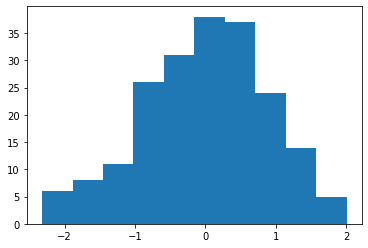

In [ ]:
# set a seed to make this reproducible
# (every time i run it i get the same result even if i use random)
np.random.seed()
# Gaussian (normally) distribute data, mean 0, sdtev 1
data = np.random.randn(200)
y, x, p = pl.hist(data)

In [ ]:
#fit a gaussian to the data
mean,std = sp.stats.norm.fit(data)
mean, std

(-0.02080601389348735, 0.9005892909003307)

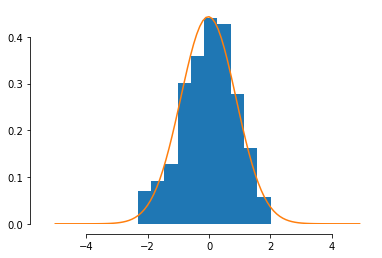

In [ ]:
y, x, p = pl.hist(data, density=True)
xr = np.arange(-5, 5, 0.1)
pl.plot(xr, sp.stats.norm.pdf(xr, loc=mean, scale=std))
sns.despine(offset=10, trim=True);


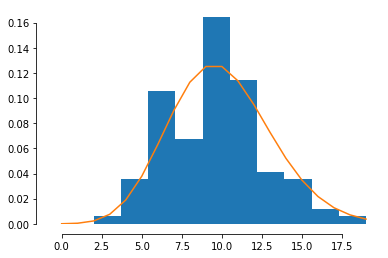

In [ ]:
#Poisson distribution with lambda = 10
data = np.random.poisson(10, 200)
yp, xp, p = pl.hist(data, bins=10, density=True)
pl.plot(range(20), sp.stats.poisson.pmf(range(20), mu=10))
sns.despine(offset=10, trim=True);


mean 2.9
median 2.9


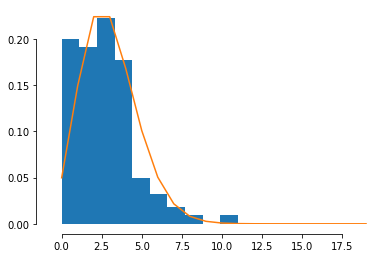

In [ ]:
#poisson distribution with lambda=3
mu = 3
data = np.random.poisson(mu, 200)
yp, xp, p = pl.hist(data, bins=10, density=True)
pl.plot(range(20), sp.stats.poisson.pmf(range(20), mu=mu))
sns.despine(offset=10, trim=True);
print("mean", data.mean())
print("median", data.mean())

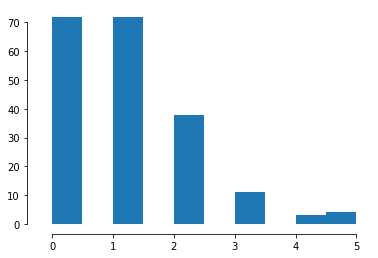

In [ ]:
#poisson distribution with lambda=1
data = np.random.poisson(1, 200)
yp, xp, p = pl.hist(data, bins=10)
sns.despine(offset=10, trim=True);


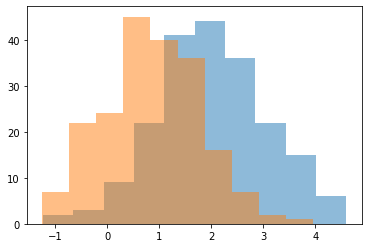

In [ ]:
#two gaussian distribution with slightly different mean, as different as the standard deviation
np.random.seed(123)
data = np.random.randn(200) + 2
y, x, p = pl.hist(data, alpha=0.5)
data = np.random.randn(200) + 1
y, x, p = pl.hist(data, alpha=0.5)